# Feature Selection
In this part, we will select features for the three models we will use


## Random Forest Feature Selection
For Random Forest, we will try three methord. After analysis, we find the benchmark model is the best, so we will keep all feature
<br>
> 1.Benchmark
<br>
> 2.Boruta 
<br>
> 3.Tree feature importance

In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import math
from boruta import BorutaPy
import dask.dataframe as dd
from dask.distributed import Client
from Error_Metrics import ErrorMetrics
from sklearn.externals.joblib import parallel_backend
import distributed.joblib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
df_train = pd.read_csv('blog_feedback_train.csv')
df_test = pd.read_csv('blog_feedback_test.csv')
X_train = df_train.loc[:, df_train.columns != '281']
y_train = df_train['281']
X_test = df_test.loc[:,df_test.columns != '281']
y_test = df_test['281']

### Benchmark 

In [23]:
rf_b = RandomForestRegressor()
with parallel_backend('dask.distributed'):
    rf_b.fit(X_train, y_train)

In [24]:
error_metrics_rf_b = ErrorMetrics(X_train, y_train, X_test, y_test)
error_metrics_rf_b.cal_metric('rf_benchmark', rf_b)

In [25]:
error_metrics_rf_b.error_metric

,Model,mae_test,mae_train,mape_test,mape_train,r_test,r_train,rmse_test,rmse_train
0,rf_benchmark,5.395912,2.124367,inf,inf,0.365769,0.902819,24.289692,11.754497


### Boruta for random Forest feature selection

In [26]:
X_boruta = df_train.loc[:, df_train.columns != '281'].values
y_boruta = df_train['281'].values
rf_regressor = RandomForestRegressor(n_estimators=100, n_jobs=2)
feat_selector = BorutaPy(rf_regressor, n_estimators='auto', verbose=2)
feat_selector.fit(X_boruta,y_boruta)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	222
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	213


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	213


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	213


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	213


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	213


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	213


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	213


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	213


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	214


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215
Iteration: 	99 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	215


/Users/xuchenlian/anaconda3/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


BorutaPy(alpha=0.05,
     estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=37, n_jobs=2,
           oob_score=False,
           random_state=<mtrand.RandomState object at 0x10f614b40>,
           verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x10f614b40>,
     two_step=True, verbose=2)

In [27]:
df_train.loc[:, df_train.columns != '281'].columns[feat_selector.support_]

Index(['1', '2', '52', '55', '61', '62'], dtype='object')

In [29]:
X_train_rf = df_train.loc[:,feat_selector.support_]
X_test_rf = df_test.loc[:,feat_selector.support_]
y_train = df_train['281']
y_test = df_test['281']

In [30]:
rf = RandomForestRegressor()
rf.fit(X_train_rf, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
error_metrics_rf = ErrorMetrics(X_train_rf, y_train, X_test_rf, y_test)

In [32]:
error_metrics_rf.cal_metric('boruta_rf', rf)

In [33]:
error_metrics_rf.error_metric

,Model,mae_test,mae_train,mape_test,mape_train,r_test,r_train,rmse_test,rmse_train
0,boruta_rf,5.24783,2.190253,inf,inf,0.435653,0.902168,22.912446,11.793793


### Tree feature importance

In [34]:
importances = list(rf_b.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
ft_tree = pd.DataFrame(feature_importances)
ft_tree.columns = ['feature','importance']

In [35]:
ft_tree = pd.DataFrame(feature_importances)
ft_tree.columns = ['feature','importance']
feat_list = ft_tree[ft_tree.importance > 0]['feature'].values
X_train_tree = df_train.loc[:, feat_list]
X_test_tree = df_test.loc[:,feat_list]

In [37]:
rf_tree = RandomForestRegressor()
rf_tree.fit(X_train_tree, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
error_metrics_tree = ErrorMetrics(X_train_tree, y_train, X_test_tree, y_test)

In [39]:
error_metrics_tree.cal_metric('tree_rf', rf_tree)

In [40]:
pd.concat([error_metrics_rf_b.error_metric, error_metrics_tree.error_metric,error_metrics_rf.error_metric], axis=0)

,Model,mae_test,mae_train,mape_test,mape_train,r_test,r_train,rmse_test,rmse_train
0,rf_benchmark,5.395912,2.124367,inf,inf,0.365769,0.902819,24.289692,11.754497
0,tree_rf,5.389772,2.088427,inf,inf,0.350078,0.910594,24.588321,11.274456
0,boruta_rf,5.247830,2.190253,inf,inf,0.435653,0.902168,22.912446,11.793793


## Linear Regression Feature Selection
For Linear Regression, we will use two methord
<br>
> 1.Benchmark
<br>
> 2.Forward Search

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.feature_selection import RFECV

In [4]:
df_train_basic = df_train.loc[:,df_train.columns.astype(int)<62]
df_test_basic = df_test.loc[:,df_test.columns.astype(int)<62]
X_train_basic = df_train_basic
X_test_basic = df_test_basic

In [16]:
from distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:57600 Dashboard: http://127.0.0.1:57601,Cluster Workers: 4 Cores: 4 Memory: 8.59 GB


In [17]:
lm_ref = LinearRegression()
lmecv = RFECV(lm_ref, step=1 ,cv=5,
              scoring='neg_mean_squared_error')
with parallel_backend('dask.distributed',scheduler_host='tcp://127.0.0.1:57600'):
    lm_re= lmecv.fit(X_train, y_train)

#print("Optimal number of features : %d" % lm_re.n_features_)

In [18]:
print("Optimal number of features : %d" % lm_re.n_features_)

Optimal number of features : 19


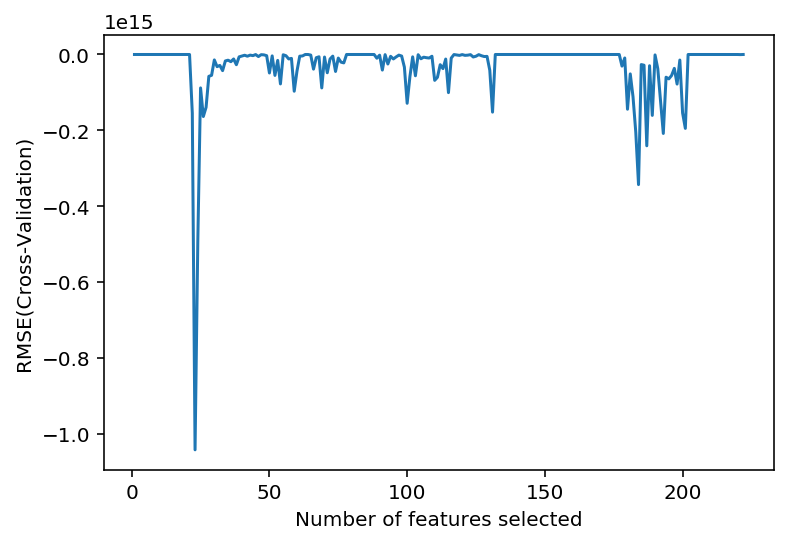

In [24]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("RMSE(Cross-Validation)")
plt.plot(range(1, len(lm_re.grid_scores_) + 1),lm_re.grid_scores_)
plt.show()

## Model Validation for Random Forest

Picture shows that when the max_depth is 9, Random Forest have best score 29.165035176497778

In [3]:
from sklearn import model_selection
X_train_tree = X_train[['1', '2', '52', '55', '61', '62']]
depth_list = []
rmse_test_list = []
for i in range(1, 60):
    rf_o = RandomForestRegressor(n_estimators=100, max_depth=i)
    depth_list.append(i)
    rmse_test = model_selection.cross_val_score(rf_o, X_train_tree, y_train, n_jobs=5, cv=3, scoring='neg_mean_squared_error')
    rmse_test_list.append(math.sqrt(np.mean(-rmse_test)))
    print(rmse_test_list)

#plt.plot(depth_list, rmse_test_list, '--r')

[36.1605225291529]
[36.1605225291529, 34.72811331678114]
[36.1605225291529, 34.72811331678114, 33.55427868605136]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.189433911403057]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.189433911403057, 29.165035176497778]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.189433911403057, 29.165035176497778, 29.20963191929579]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.18943

[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.189433911403057, 29.165035176497778, 29.20963191929579, 29.32679134537987, 29.470927903296054, 29.61131502802504, 29.696708464752653, 29.77251257910198, 29.8909509533125, 29.69632242602937, 29.80195436078733, 29.816792221642913, 29.708959387838924, 29.627896409208166, 29.788823754560177, 29.799646512584175, 29.650708573001914, 29.92834201525766, 29.916949028351752, 29.88029189613026, 29.863980290283436, 29.833929551454656, 29.84724135512252, 29.92264847510916]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.189433911403057, 29.165035176497778, 29.20963191929579, 29.32679134537987, 29.470927903296054, 29.61131502802504, 29.696708464752653, 29.77251257910198, 29.8909509533125, 29.69632242602937, 29.80195436078733, 29.816792221642913, 29.708959387838924, 29.627896409208166, 29.788823754560177, 29.799

[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.189433911403057, 29.165035176497778, 29.20963191929579, 29.32679134537987, 29.470927903296054, 29.61131502802504, 29.696708464752653, 29.77251257910198, 29.8909509533125, 29.69632242602937, 29.80195436078733, 29.816792221642913, 29.708959387838924, 29.627896409208166, 29.788823754560177, 29.799646512584175, 29.650708573001914, 29.92834201525766, 29.916949028351752, 29.88029189613026, 29.863980290283436, 29.833929551454656, 29.84724135512252, 29.92264847510916, 29.891343713384288, 29.825838835707106, 29.78005633436014, 29.79667324928049, 29.805078229472205, 29.83917206116745, 29.821932359120698, 29.784187754206076, 29.80892965527705, 29.796861940411958, 29.803175726164593, 29.80182867049049]
[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.189433911403057, 29.165035176497778, 29.20963191929579, 29.3

[36.1605225291529, 34.72811331678114, 33.55427868605136, 31.339270270919997, 29.846176979013464, 29.318514990501047, 29.189433911403057, 29.165035176497778, 29.20963191929579, 29.32679134537987, 29.470927903296054, 29.61131502802504, 29.696708464752653, 29.77251257910198, 29.8909509533125, 29.69632242602937, 29.80195436078733, 29.816792221642913, 29.708959387838924, 29.627896409208166, 29.788823754560177, 29.799646512584175, 29.650708573001914, 29.92834201525766, 29.916949028351752, 29.88029189613026, 29.863980290283436, 29.833929551454656, 29.84724135512252, 29.92264847510916, 29.891343713384288, 29.825838835707106, 29.78005633436014, 29.79667324928049, 29.805078229472205, 29.83917206116745, 29.821932359120698, 29.784187754206076, 29.80892965527705, 29.796861940411958, 29.803175726164593, 29.80182867049049, 29.776145325397437, 29.783792070087436, 29.780400553018247, 29.782243366419177, 29.7800974608583, 29.780096938834216, 29.774871774814592, 29.774871774814592, 29.774871774814592, 29

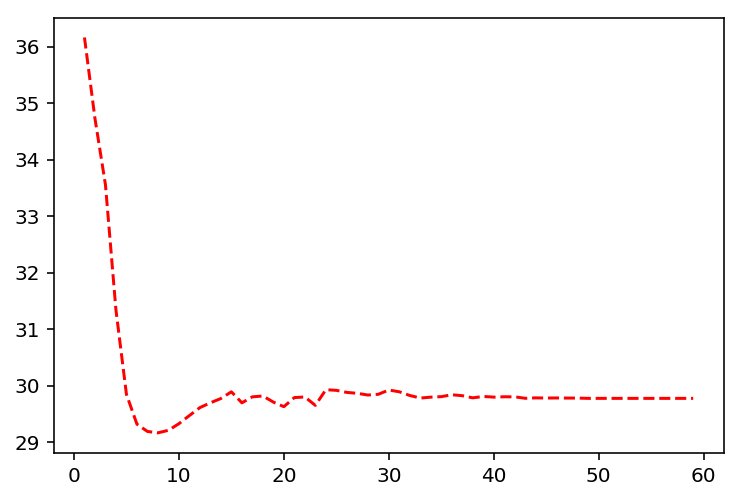

In [4]:
plt.plot(depth_list, rmse_test_list, '--r')